<a href="https://colab.research.google.com/github/pal-ette/iNotePal/blob/6-corpus/%EA%B0%90%EC%84%B1%EB%8C%80%ED%99%94%EB%A7%90%EB%AD%89%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [93]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [94]:
!curl -o "aihubshell" https://api.aihub.or.kr/api/aihubshell.do

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6634  100  6634    0     0   6464      0  0:00:01  0:00:01 --:--:--  6465


In [96]:
!chmod +x aihubshell
!sudo cp aihubshell /usr/bin/
!cd /usr/bin/

In [102]:
!ls -al | grep aihubshell

-rwxr-xr-x 1 root root 6634 Apr 12 05:54 aihubshell


In [103]:
!aihubshell -mode l | grep 감성

86, 감성 대화 말뭉치
466, 감성 및 발화 스타일별 음성합성 데이터
71349, 감성 및 발화스타일 동시 고려 음성합성 데이터
71518, 서울 지역 중학생들의 국어, 수학 교과용 감성 AI 튜터 데이터


In [104]:
os.makedirs('sentiment_corpus')
os.chdir('sentiment_corpus')
print(os.getcwd())

/content/sentiment_corpus


In [105]:
os.environ['AIHUB_ID'] = 'miniejung@naver.com'
os.environ['AIHUB_PW'] = ''

In [106]:
!aihubshell -mode d -datasetkey 86

aihubshell version 24.01.29 v0.3
Authentication successful.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 20.3M    0 20.3M    0     0  6458k      0 --:--:--  0:00:03 --:--:-- 9667k
Request successful with HTTP status 200.
Download successful.
018.감성대화/Validation_221115_add/원천데이터/감성대화말뭉치(최종데이터)_Validation.zip.part0
018.감성대화/Validation_221115_add/라벨링데이터/감성대화말뭉치(최종데이터)_Validation.zip.part0
018.감성대화/Training_221115_add/라벨링데이터/감성대화말뭉치(최종데이터)_Training.zip.part0
018.감성대화/Training_221115_add/원천데이터/감성대화말뭉치(최종데이터)_Training.zip.part0
잠시 기다려 주세요 병합중 입니다. 
Merging 감성대화말뭉치(최종데이터)_Validation.zip in ./018.감성대화/Validation_221115_add/원천데이터
Merging 감성대화말뭉치(최종데이터)_Validation.zip in ./018.감성대화/Validation_221115_add/라벨링데이터
Merging 감성대화말뭉치(최종데이터)_Training.zip in ./018.감성대화/Training_221115_add/원천데이터
Merging 감성대화말뭉치(최종

In [112]:
os.chdir('..')
os.makedirs('data6')
os.chdir('data6')
print(os.getcwd())

/content/data6


In [113]:
!unzip -qq "/content/sentiment_corpus/018.감성대화/Training_221115_add/원천데이터/감성대화말뭉치(최종데이터)_Training.zip"
!unzip -qq "/content/sentiment_corpus/018.감성대화/Validation_221115_add/원천데이터/감성대화말뭉치(최종데이터)_Validation.zip"

In [116]:
df_train = pd.read_excel('/content/data6/감성대화말뭉치(최종데이터)_Training.xlsx', index_col=0)
df_valid = pd.read_excel('/content/data6/감성대화말뭉치(최종데이터)_Validation.xlsx', index_col=0)
print("TRAIN", len(df_train), ", VALID", len(df_valid))

TRAIN 51630 , VALID 6641


In [117]:
df = pd.concat([df_train, df_valid], ignore_index=True)
df.head()

,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN


In [78]:
df['연령'].value_counts()

연령
노년     16640
청년     16405
중년     13207
청소년    12019
Name: count, dtype: int64

In [79]:
df['성별'].value_counts().keys()

Index(['여성', '남성'], dtype='object', name='성별')

In [80]:
df['신체질환'].unique()

array(['해당없음', '만성질환 유', '만성질환 무'], dtype=object)

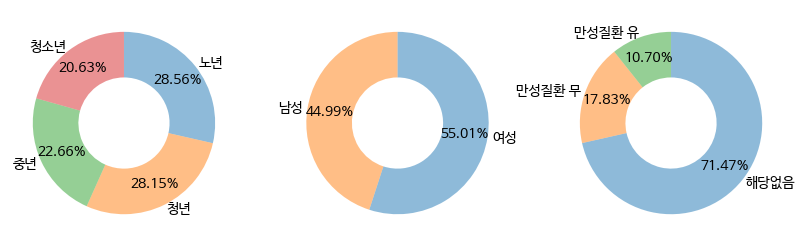

In [81]:
plt.rc('font', family='NanumBarunGothic')

columns = ['연령', '성별', '신체질환']

plt.figure(figsize=(10, 30))

for i, c in enumerate(columns):
  values = df[c].value_counts()
  ax = plt.subplot(1, 3, i+1)
  plt.pie(values, startangle=90, counterclock=False, textprops={'fontsize': 10},
          autopct=lambda p : '{:.2f}%'.format(p), wedgeprops={"alpha": 0.5, "width":0.5}, pctdistance=0.75,
          labels=values.keys(), labeldistance=1.05)

In [92]:
df['감정_대분류'].unique()

array(['분노', '기쁨', '불안', '당황', '슬픔', '상처'], dtype=object)

In [83]:
df['감정_소분류'].unique()

array(['노여워하는', '느긋', '걱정스러운', '당혹스러운', '당황', '마비된', '만족스러운', '배신당한',
       '버려진', '부끄러운', '분노', '불안', '비통한', '상처', '성가신', '스트레스 받는', '슬픔',
       '신뢰하는', '신이 난', '실망한', '악의적인', '안달하는', '안도', '억울한', '열등감', '염세적인',
       '외로운', '우울한', '고립된', '좌절한', '후회되는', '혐오스러운', '한심한', '자신하는', '기쁨',
       '툴툴대는', '남의 시선을 의식하는', '회의적인', '죄책감의', '혼란스러운', '초조한', '흥분',
       '충격 받은', '취약한', '편안한', '방어적인', '질투하는', '두려운', '눈물이 나는', '짜증내는',
       '조심스러운', '낙담한', '환멸을 느끼는', '희생된', '감사하는', '구역질 나는', '괴로워하는',
       '가난한, 불우한'], dtype=object)

In [84]:
cnt = len(df['감정_소분류'].unique())
emotion_list = list(df['감정_소분류'].unique())
print(f'{cnt} 감정 \n항목 : {emotion_list}')

58 감정 
항목 : ['노여워하는', '느긋', '걱정스러운', '당혹스러운', '당황', '마비된', '만족스러운', '배신당한', '버려진', '부끄러운', '분노', '불안', '비통한', '상처', '성가신', '스트레스 받는', '슬픔', '신뢰하는', '신이 난', '실망한', '악의적인', '안달하는', '안도', '억울한', '열등감', '염세적인', '외로운', '우울한', '고립된', '좌절한', '후회되는', '혐오스러운', '한심한', '자신하는', '기쁨', '툴툴대는', '남의 시선을 의식하는', '회의적인', '죄책감의', '혼란스러운', '초조한', '흥분', '충격 받은', '취약한', '편안한', '방어적인', '질투하는', '두려운', '눈물이 나는', '짜증내는', '조심스러운', '낙담한', '환멸을 느끼는', '희생된', '감사하는', '구역질 나는', '괴로워하는', '가난한, 불우한']


In [85]:
emotion_count = df.groupby(['감정_대분류', '감정_소분류'])['성별'].count()

In [86]:
first_emotions = np.sort(df['감정_대분류'].unique())
base_colors = ['lightcoral', 'orange', 'gold', 'forestgreen', 'cornflowerblue', 'rebeccapurple']
cmap = {}

for i in range(len(first_emotions)):
  cmap[first_emotions[i]] = base_colors[i]

cmap

{'기쁨': 'lightcoral',
 '당황': 'orange',
 '분노': 'gold',
 '불안': 'forestgreen',
 '상처': 'cornflowerblue',
 '슬픔': 'rebeccapurple'}

In [87]:
base_colors = ['lightcoral', 'orange', 'gold', 'forestgreen', 'cornflowerblue', 'rebeccapurple']

cnt_dict = {"first":[], "second":[], "cnt":[], "color":[]}

for k, v in emotion_count.items():
  cnt_dict['first'].append(k[0])
  if k[1] in cnt_dict['second']:
    print(k[1])
    cnt_dict['second'].append('*'+k[1])
  else:
    cnt_dict['second'].append(k[1])
  cnt_dict['cnt'].append(v)
  cnt_dict['color'].append(cmap[k[0]])

혼란스러운
고립된


In [88]:
df_cnt = pd.DataFrame(cnt_dict)
df_cnt.head()

,first,second,cnt,color
0,기쁨,감사하는,761,lightcoral
1,기쁨,기쁨,763,lightcoral
2,기쁨,느긋,670,lightcoral
3,기쁨,만족스러운,779,lightcoral
4,기쁨,신뢰하는,765,lightcoral


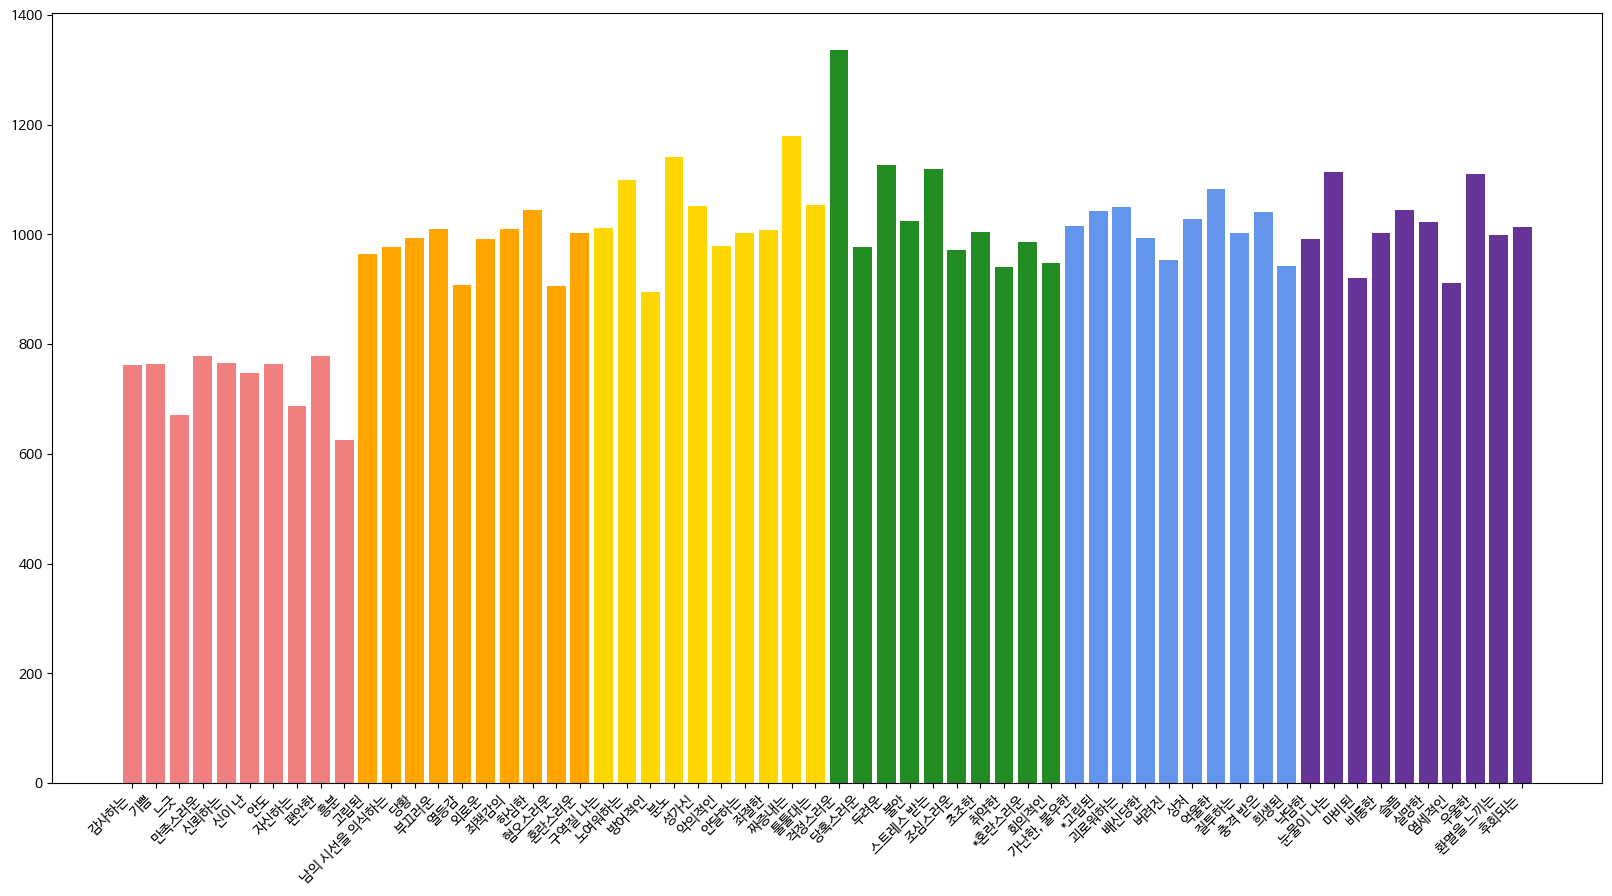

In [89]:
plt.figure(figsize=(20, 10))
plt.bar(df_cnt['second'], df_cnt['cnt'], color=df_cnt['color'])
plt.xticks(rotation=45, ha='right')
# plt.legend(cmap)

plt.show()

# Data Preprocessing

In [90]:
df.head()

,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN


In [91]:
df.isna().sum()

연령            0
성별            0
상황키워드         0
신체질환          0
감정_대분류        0
감정_소분류        0
사람문장1         0
시스템문장1        0
사람문장2         0
시스템문장2        0
사람문장3     10890
시스템문장3    10890
dtype: int64

### 감성대화말뭉치
`'분노', '기쁨', '불안', '당황', '슬픔', '상처'`

### 단발성대화데이터셋
`'공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오'`